# Imports

In [1]:
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Normalização

In [2]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')
mediaChance = data_frame['Chance of Admit '].mean()

In [3]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['University Rating'] = data_frame['University Rating'] / data_frame['University Rating'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [4]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ', 'University Rating']]
y = data_frame['Chance of Admit ']
x = scale(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [5]:
data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,0.8,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,0.8,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,0.6,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,0.6,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,0.4,0.4,0.6,0.827621,0,0.0


# SOM

In [6]:
size = 6
som = MiniSom(size, size, len(x[0]) , neighborhood_function='bubble', sigma=1, learning_rate = 0.5, random_seed=1)

In [7]:
som.pca_weights_init(x)
som.train_batch(x, 100, verbose=True)

 [ 100 / 100 ] 100% 0.00075 it/s

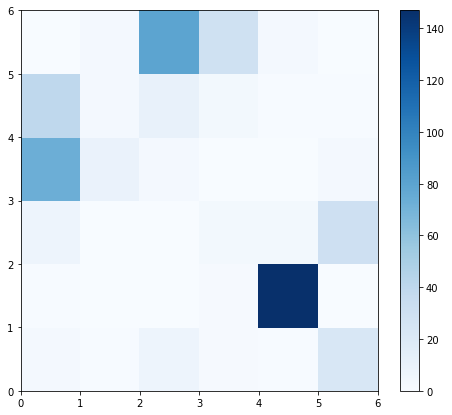

In [8]:
plt.figure(figsize=(8, 7))
frequencies = np.zeros((size, size))
for position, values in som.win_map(x).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()


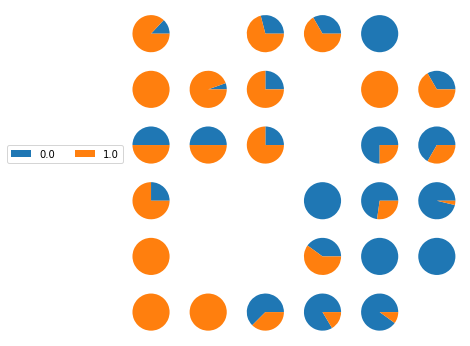

In [9]:
labels_map = som.labels_map(x, y)
label_names = np.unique(y)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 3), ncol=3)
plt.show()

# K-Means

In [10]:
kmeans = KMeans(n_clusters = 2, init = 'random')

In [11]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.cluster_centers_

array([[ 0.75100988,  0.72876778,  0.78527484,  0.74083741,  0.65645599,
         0.72132337],
       [-0.70443562, -0.68357288, -0.73657562, -0.69489401, -0.61574554,
        -0.67659014]])

In [13]:
distance = kmeans.fit_transform(x)
distance

array([[5.2111167 , 1.8928603 ],
       [3.25746958, 0.94093557],
       [1.15990685, 2.74967302],
       [2.17799729, 2.13272113],
       [0.91126338, 3.70034865],
       [4.5036305 , 1.77561222],
       [2.00234544, 2.05590667],
       [1.35244328, 3.61635022],
       [2.14725014, 5.35414469],
       [1.98278224, 1.83974544],
       [2.22575823, 1.75399341],
       [3.64353071, 0.51102807],
       [3.81248837, 0.54246892],
       [1.76942178, 2.79624521],
       [1.44002572, 3.35399878],
       [1.27574411, 2.77209794],
       [1.99442229, 1.86807867],
       [1.80266025, 2.49735977],
       [2.31198335, 1.64341702],
       [1.28769488, 3.0925702 ],
       [1.4418238 , 3.54446943],
       [2.96190067, 2.77184934],
       [5.35057732, 1.94662688],
       [5.70609083, 2.26851675],
       [5.29500855, 2.29274427],
       [5.76171763, 2.39276535],
       [3.57617156, 1.36253945],
       [2.09168175, 5.48564276],
       [3.06265023, 6.48690337],
       [2.2035654 , 5.42179516],
       [1.

1 3000.0
2 1493.4510852217868
3 1124.4618099892978
4 979.5149412929693
5 874.7550219367439
6 813.3271369489455
7 756.9483047884535
8 712.358310310658
9 682.689483913214


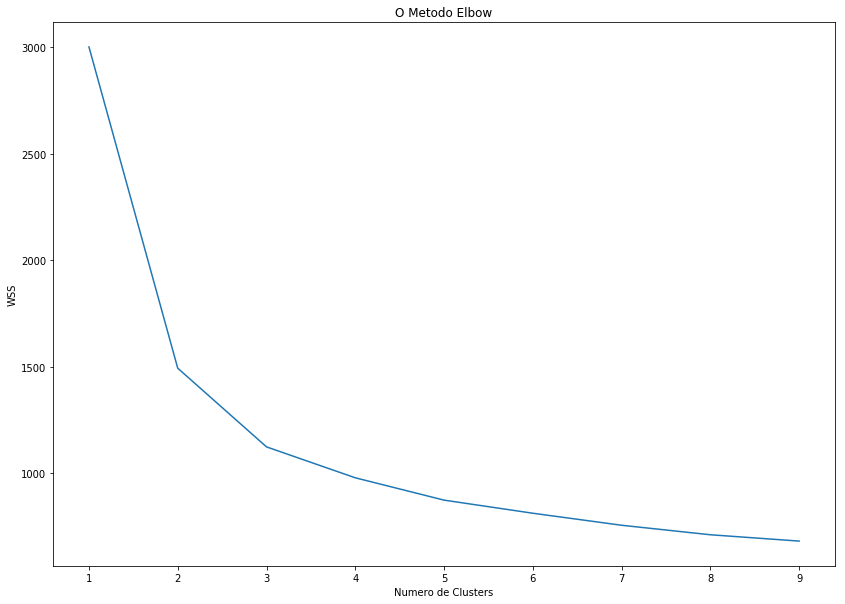

In [14]:
wcss = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(x)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
    
plt.rcParams['figure.figsize'] = (14,10)
plt.plot(range(1, 10), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

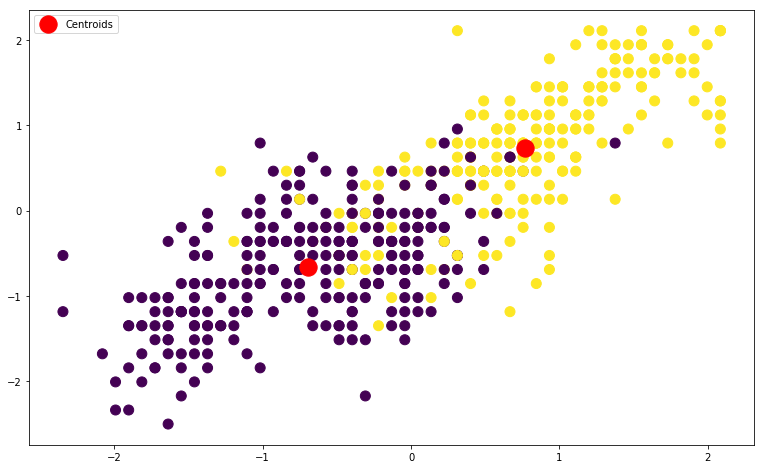

In [15]:
kmeans = KMeans(n_clusters = 2, init = 'random')
kmeans.fit(x)

plt.rcParams['figure.figsize'] = (13,8)
plt.scatter(x[:, 0], x[:, 1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()

plt.show()

# Hierárquico

In [18]:
hierarquica = AgglomerativeClustering(n_clusters=2, linkage='single')
pred = hierarquica.fit_predict(x)

No handles with labels found to put in legend.


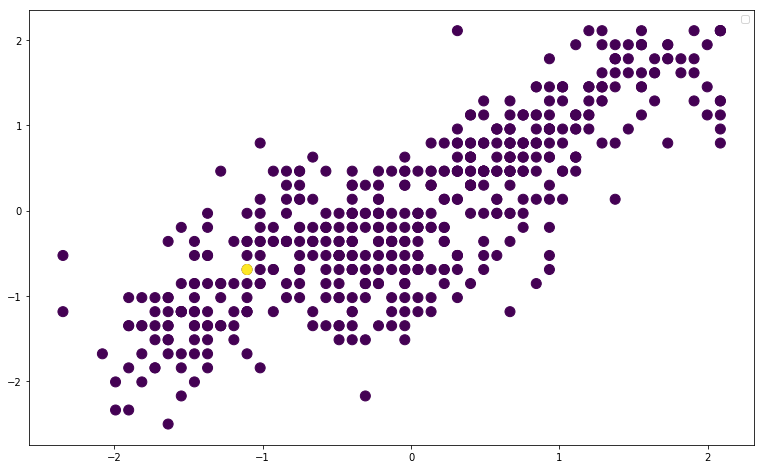

In [20]:
plt.rcParams['figure.figsize'] = (13,8)
plt.scatter(x[:, 0], x[:, 1], s = 100, c = pred)
plt.legend()

plt.show()